In [2]:
!pip install torchvision

In [49]:
from torchvision.datasets import FashionMNIST

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

from sklearn.neural_network import MLPClassifier

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family = 'Malgun Gothic')

from sklearn.metrics import accuracy_score, confusion_matrix

def plot_confusion_matrix(cm, classes, title, cmap = plt.cm.Blues):
    
    plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title,fontsize = 30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment = 'center',
                color = 'red' if cm[i, j] > thresh else 'black', fontsize = 30)
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

In [22]:
import torch.utils.data

In [9]:
import warnings, itertools, time

In [10]:
warnings.filterwarnings(action = 'ignore')

In [28]:
root = 'C:/Users/win10/Desktop'

fasion_mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.,),(1.0,)) #인공신경망은 단위를 인지하지 못함.
])

dataset = FashionMNIST(root, transform=fasion_mnist_transform, train = True, download=True)

train_dataset, valid_dataset = torch.utils.data.random_split(dataset, [50000, 10000])

test_dataset = FashionMNIST(root, transform =fasion_mnist_transform, train=False, download=True)

In [30]:
model = MLPClassifier(random_state=0, hidden_layer_sizes=(300, 150), activation = 'relu', solver = 'adam', batch_size = 100, learning_rate='constant', learning_rate_init = 0.001, verbose= True, early_stopping=True, validation_fraction = 10000/60000, n_iter_no_change= 5)

In [32]:
start = time.time()
model.fit(dataset.data.numpy().reshape(60000, -1), dataset.targets.numpy())
print('time', time.time() - start)

Iteration 1, loss = 3.11492803
Validation score: 0.809600
Iteration 2, loss = 0.78157605
Validation score: 0.811100
Iteration 3, loss = 0.52086929
Validation score: 0.824400
Iteration 4, loss = 0.43067952
Validation score: 0.840300
Iteration 5, loss = 0.40230060
Validation score: 0.850500
Iteration 6, loss = 0.38315700
Validation score: 0.845800
Iteration 7, loss = 0.36813848
Validation score: 0.850500
Iteration 8, loss = 0.36631423
Validation score: 0.850900
Iteration 9, loss = 0.35753996
Validation score: 0.867500
Iteration 10, loss = 0.35008387
Validation score: 0.853600
Iteration 11, loss = 0.35052686
Validation score: 0.855600
Iteration 12, loss = 0.33775377
Validation score: 0.868100
Iteration 13, loss = 0.32866185
Validation score: 0.866600
Iteration 14, loss = 0.32387216
Validation score: 0.864700
Iteration 15, loss = 0.33065299
Validation score: 0.873000
Iteration 16, loss = 0.31649940
Validation score: 0.863700
Iteration 17, loss = 0.31191974
Validation score: 0.871900
Iterat

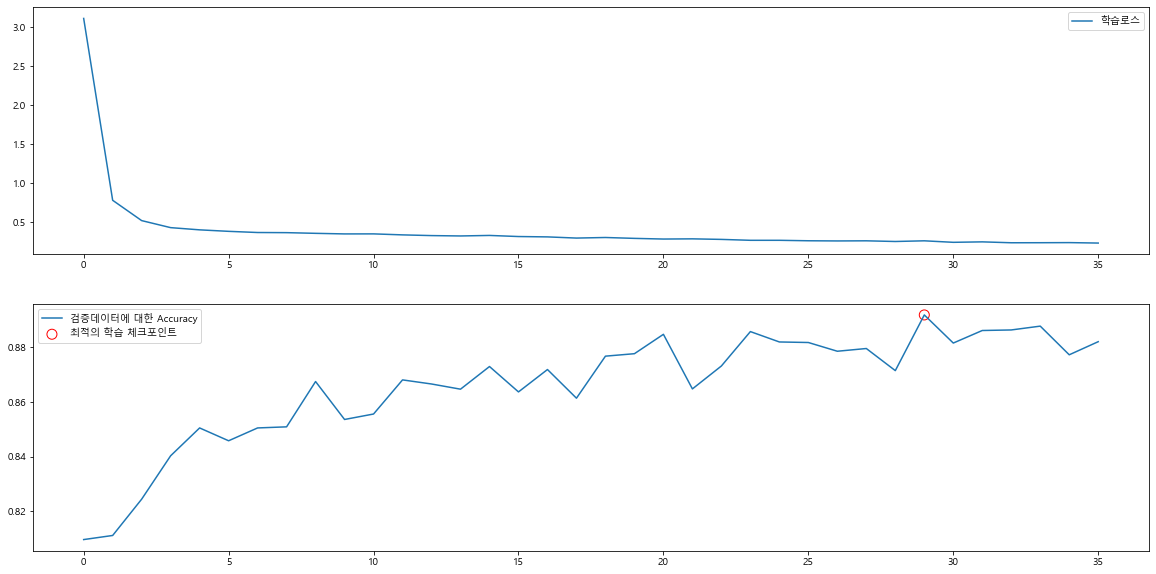

In [37]:
train_loss = model.loss_curve_

f, axs = plt.subplots(2, 1, figsize=(20,10))

axs[0].plot(train_loss, label = '학습로스')
axs[0].legend()

axs[1].plot(model.validation_scores_, label = '검증데이터에 대한 Accuracy')
axs[1].scatter(np.argmax(model.validation_scores_), np.max(model.validation_scores_), s= 100, facecolors = 'none', edgecolors='red', label="최적의 학습 체크포인트")
axs[1].legend()
plt.show()

In [42]:
train_accuracy = accuracy_score(y_pred=model.predict(dataset.data.numpy().reshape(60000, -1)), y_true=dataset.targets.numpy())
test_accuracy = accuracy_score(y_pred=model.predict(test_dataset.data.numpy().reshape(10000, -1)), y_true=test_dataset.targets.numpy())
'훈련데이터셋 정확도:', train_accuracy, '테스트', test_accuracy

('훈련데이터셋 정확도:', 0.91545, '테스트', 0.8814)

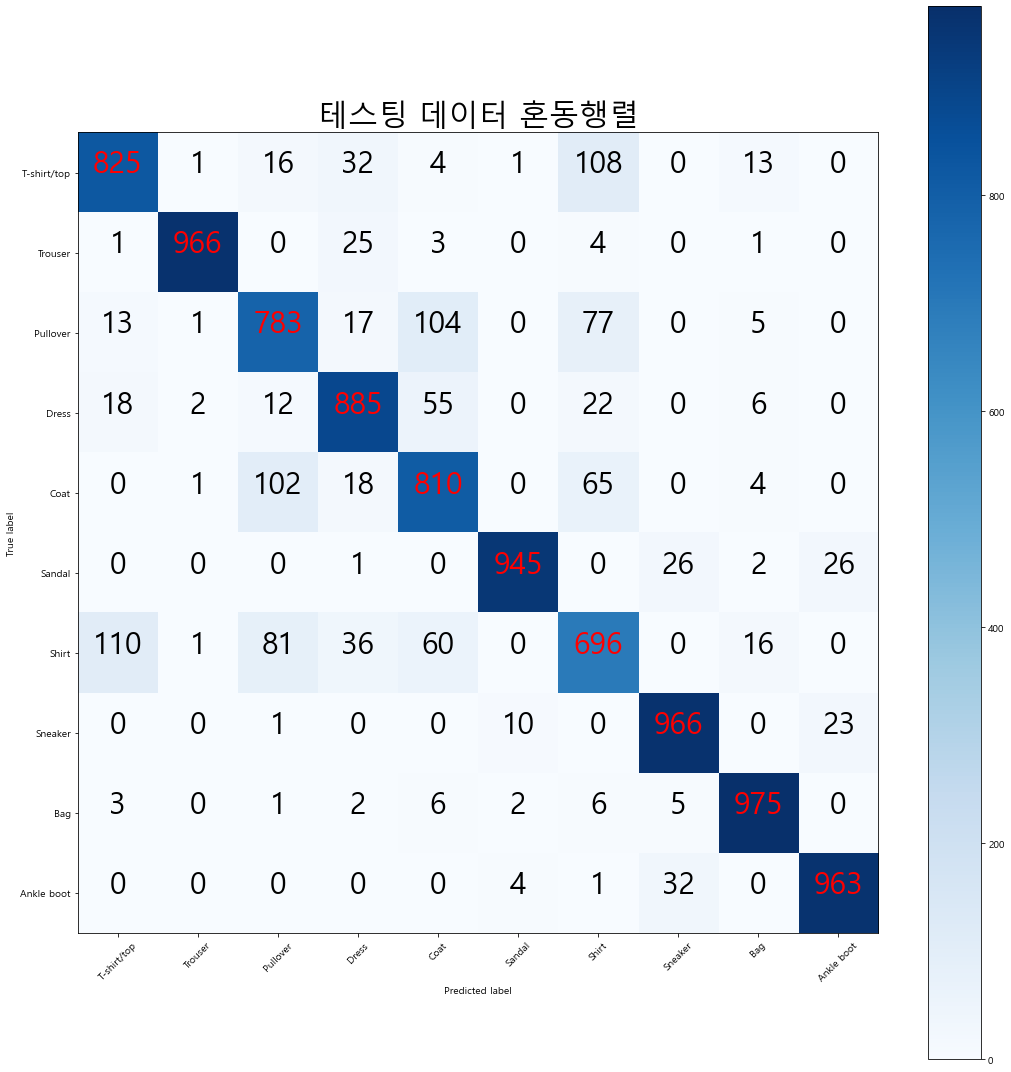

In [50]:
confusion_matrix = confusion_matrix(y_pred=model.predict(test_dataset.data.numpy().reshape(10000,-1)), y_true=test_dataset.targets.numpy())
plot_confusion_matrix(cm = confusion_matrix, classes = dataset.classes,title='테스팅 데이터 혼동행렬')

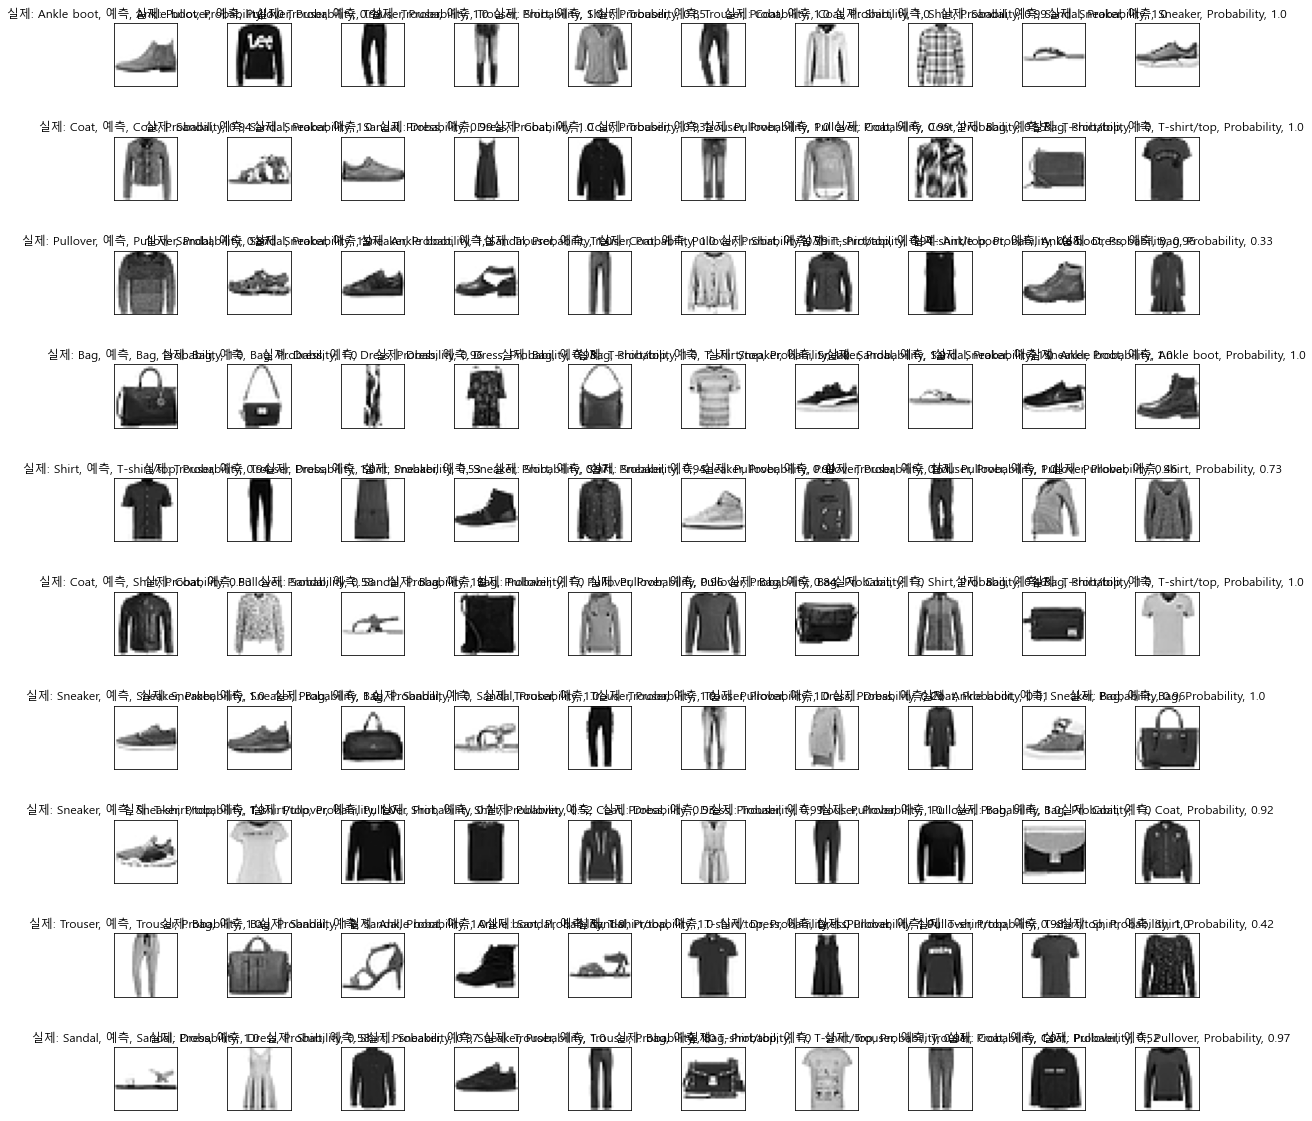

In [58]:
for_visualization_test_x = test_dataset.data.numpy()[:100]
for_visualization_test_y = test_dataset.targets.numpy()[:100]
f, axs = plt.subplots(10, 10, figsize=(20,20))
plt.subplots_adjust(hspace=0.8)
for i in range(10):
    for j in range(10):
        
        x_data = for_visualization_test_x[10*i+j]
        y_data = for_visualization_test_y[10*i+j]
        real_class = dataset.classes[y_data]
        predicted_class = dataset.classes[np.argmax(model.predict_proba(x_data.reshape(1, -1)))]
        predicted_prob = np.max(model.predict_proba(x_data.reshape(1, -1))).round(2)
        
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        
        axs[i, j].set_title(f'실제: {real_class}, 예측, {predicted_class}, Probability, {predicted_prob}')
        
        axs[i,j].imshow(x_data.reshape((28,28)), cmap=plt.cm.gray_r)
        

        
plt.show()    